In [1]:
%pip install numpy
%pip install matplotlib
%pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

In [3]:
def preprocess_data(X, y, filter_digits):
    mask = (y == filter_digits[0]) | (y == filter_digits[1])
    Xout = X[mask]
    yout = y[mask]
    return Xout, yout

In [4]:
def convert_to_binary(y, threshold=1):
    binarized_data = np.where(y >= threshold, 2, 0)
    return binarized_data

In [5]:
def misclassification_err(y_true, y_pred):
    return np.mean(y_true != y_pred)

In [6]:
def create_plot(neighbor_size, train_err_knn, test_err_knn, 
n_train_total, lr_train_err, lr_test_err, df_lr=3, k_opt=None, title="kNN vs Linear Regression"):
    m = len(neighbor_size)
    x_positions = np.arange(1, m + 1)
    df_vals = np.round(n_train_total / neighbor_size).astype(int)
    idx_lr = int(np.argmin(np.abs(df_vals - df_lr)))
    x_lr = x_positions[idx_lr]

    y_vals = np.concatenate([train_err_knn, test_err_knn])
    ymin = float(np.min(y_vals)) - 0.01
    ymax = float(np.max(y_vals)) + 0.01

    fig, ax = plt.subplots(figsize=(9, 5.5))
    ax.set_xlim(0.5, m + 0.5)
    ax.set_ylim(ymin, ymax)

    ax.set_xlabel("Degrees of Freedom")
    ax.set_xticks(x_positions[::-1])
    ax.set_xticklabels(df_vals)
    ax.set_ylabel("Misclassification rate")

    ax2 = ax.secondary_xaxis('top')
    ax2.set_xticks(x_positions[::-1])
    ax2.set_xticklabels(neighbor_size)
    ax2.set_xlabel("k (number of neighbors)")

    ax.plot(x_positions, test_err_knn[::-1],  marker="o", linestyle="-",  color="magenta", label="kNN Test Error")
    ax.plot(x_positions, train_err_knn[::-1], marker="o", linestyle="--", color="blue",    label="kNN Train Error")

    ax.grid(True, alpha=0.3)
    ax.set_title(title)
    ax.legend(loc="lower left", fontsize=9)
    plt.tight_layout()

    plt.tight_layout(rect=(0, 0.08, 1, 1))  # leave ~8% at bottom
    fig.text(
        0.5, 0.02,
        f"Linear Regression: train error = {lr_train_err:.4f}, test error = {lr_test_err:.4f}",
        ha="center", va="bottom", fontsize=10
    )
    plt.show()

In [7]:
FILTER_DIGITS = (0, 2) # Last 2 digits of Zubair's UIN
K_RANGE = range(1, 21)
# Setting up paths to train/test data
DATAFOLDER = "pen+based+recognition+of+handwritten+digits/"
TRAIN_FILENAME = "pendigits.tra"
TEST_FILENAME = "pendigits.tes"
train_path = DATAFOLDER + TRAIN_FILENAME
test_path = DATAFOLDER + TEST_FILENAME

In [8]:
train_data = np.loadtxt(train_path, delimiter=",")
test_data = np.loadtxt(test_path, delimiter=",")
n_samples = len(train_data)

In [9]:
X_train = train_data[:, 0:16]
y_train = train_data[:, 16]
X_test = test_data[:, 0:16]
y_test = test_data[:, 16]
X_train, y_train = preprocess_data(X_train, y_train, FILTER_DIGITS)
X_test, y_test = preprocess_data(X_test, y_test, FILTER_DIGITS)

print(len(X_train))
print(len(X_test))
d0, d1 = FILTER_DIGITS
threshold = 0.5 * (d0 + d1)  # midpoint between the two digits

1560
727


In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
yhat_train_cont = lr.predict(X_train)
yhat_test_cont  = lr.predict(X_test)
yhat_train_lr = np.where(yhat_train_cont >= threshold, d1, d0)
yhat_test_lr  = np.where(yhat_test_cont  >= threshold, d1, d0)

lr_train_err = misclassification_err(y_train, yhat_train_lr)
lr_test_err  = misclassification_err(y_test,  yhat_test_lr)
print(f"[Linear Regression] train error = {lr_train_err:.4f}, test error = {lr_test_err:.4f}")

[Linear Regression] train error = 0.0000, test error = 0.0220


In [12]:
knn_train_errs = []
knn_test_errs  = []

for k in K_RANGE:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    yhat_train_knn = knn.predict(X_train)
    yhat_test_knn  = knn.predict(X_test)
    tr_err = misclassification_err(y_train, yhat_train_knn)
    te_err = misclassification_err(y_test,  yhat_test_knn)
    knn_train_errs.append(tr_err)
    knn_test_errs.append(te_err)
    print(f"k={k:2d} train err = {tr_err:.4f} | test err = {te_err:.4f}")

k= 1 train err = 0.0000 | test err = 0.0083
k= 2 train err = 0.0000 | test err = 0.0069
k= 3 train err = 0.0006 | test err = 0.0083
k= 4 train err = 0.0006 | test err = 0.0069
k= 5 train err = 0.0006 | test err = 0.0083
k= 6 train err = 0.0006 | test err = 0.0083
k= 7 train err = 0.0006 | test err = 0.0110
k= 8 train err = 0.0006 | test err = 0.0110
k= 9 train err = 0.0006 | test err = 0.0110
k=10 train err = 0.0006 | test err = 0.0110
k=11 train err = 0.0006 | test err = 0.0110
k=12 train err = 0.0006 | test err = 0.0110
k=13 train err = 0.0006 | test err = 0.0110
k=14 train err = 0.0006 | test err = 0.0110
k=15 train err = 0.0006 | test err = 0.0110
k=16 train err = 0.0006 | test err = 0.0110
k=17 train err = 0.0006 | test err = 0.0124
k=18 train err = 0.0006 | test err = 0.0124
k=19 train err = 0.0006 | test err = 0.0124
k=20 train err = 0.0006 | test err = 0.0124


In [13]:
knn_test_errs = np.array(knn_test_errs)
best_idx = int(np.argmin(knn_test_errs))
best_k   = list(K_RANGE)[best_idx]
best_err = float(knn_test_errs[best_idx])
dof_best = len(X_train) / best_k

print(f"\nOptimal k = {best_k} with test error = {best_err:.4f}")
print(f"Degrees of freedom for k={best_k}: {len(X_train)}/{best_k} = {dof_best:.1f}")


Optimal k = 2 with test error = 0.0069
Degrees of freedom for k=2: 1560/2 = 780.0


**1a)**

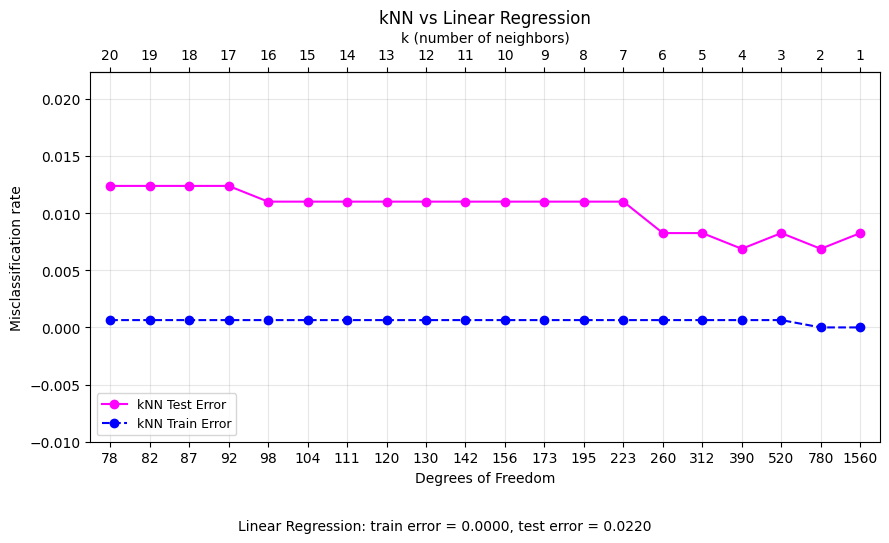

In [14]:
ks = list(K_RANGE)

n_train_total = len(X_train)

create_plot(
    np.array(ks),
    knn_train_errs,
    knn_test_errs,
    n_train_total,
    lr_train_err,
    lr_test_err,
    df_lr=3,
    k_opt=best_k,
    title="kNN vs Linear Regression"
)

**1b)**

The plot does match our intuition of the bias-variance tradeoff. We can see that the training error 
is very low as expected; however, once we generalize to unseen data we get the typical U shape curve as seen in lecture.
On the left side of the plot we have the "less complex" models which have higher bias and lower variance. 
The right side of the plot is the "most complex" model with most degrees of freedom so we have low bias but high variance. Note that in our plot we plotted in order of increasing model complexity (so decreasing k value).
The optimal k value is k = 2 with 780 degrees of freedom calculated by taking n=1560 and divding it by k=2. The training
error for this value of k is about 0 whereas the testing error is 0.0069. 